# classifying tumour as belign or malignant based on different features

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv(r'C:\Users\ADMIN\Documents\tumorology.csv')

In [5]:
df.head()

,Diagnosis,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave points_largest,symmetry_largest,fractal_dimension_largest
0,B,14.85,19.05,94.11,683.4,0.12780,0.12910,0.15330,0.09222,0.2530,0.06510
1,B,13.83,30.50,91.46,574.7,0.13040,0.24630,0.24340,0.12050,0.2972,0.09261
2,B,14.91,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
3,B,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
4,B,15.50,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263


In [5]:
df["Diagnosis"].value_counts()

B    202
M     82
Name: Diagnosis, dtype: int64

In [6]:
sns.set_style('whitegrid')
# color palettes
pal = ['#0e2433', '#ff007f']

In [9]:
#Exploring data

In [7]:
df.shape

(284, 11)

In [8]:
df.columns

Index(['Diagnosis', 'radius_largest', 'texture_largest', 'perimeter_largest',
       'area_largest', 'smoothness_largest', 'compactness_largest',
       'concavity_largest', 'concave points_largest', 'symmetry_largest',
       'fractal_dimension_largest'],
      dtype='object')

In [10]:
df.isna().sum()

Diagnosis                    0
radius_largest               0
texture_largest              0
perimeter_largest            0
area_largest                 0
smoothness_largest           0
compactness_largest          0
concavity_largest            0
concave points_largest       0
symmetry_largest             0
fractal_dimension_largest    0
dtype: int64

In [11]:
#watching for relation between features

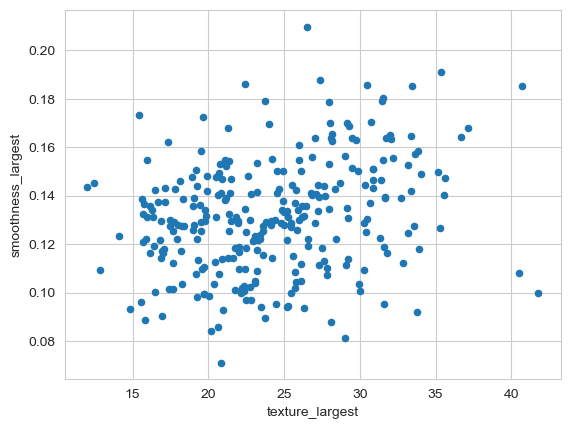

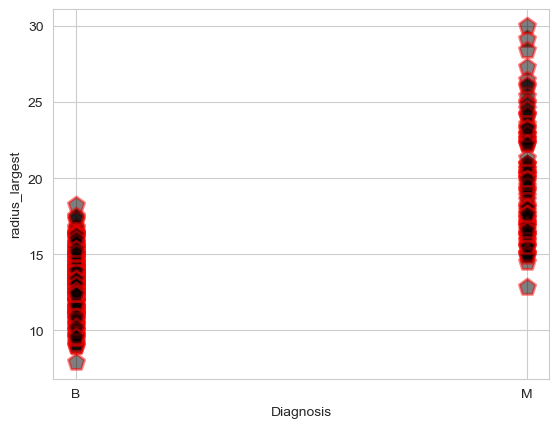

In [30]:
df.plot.scatter(x ="texture_largest", y="smoothness_largest")

#Second Scatter plot
df.plot.scatter(x="Diagnosis", y = "radius_largest", c ="k",linewidths = 2,marker ="p",edgecolor ="red",s = 150,alpha=0.5)
plt.show()

### from above we can say that radius of tumour does determine the type of tumour such that 'benign' have small radius and vice versa




## Now preparing data for classification

In [12]:
df['Diagnosis'] = df['Diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [13]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.575, random_state=42)

In [15]:
len(X_test)

164

In [22]:
#Building Knn model
model = KNeighborsClassifier(n_neighbors = 3)

In [23]:
# training the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# computing accuracy of model
pred = model.predict(X_test)
model.score(X_test,y_test)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

0.8902439024390244

### 89% is not bad since the dataset is small maybe if we had a larger database it could be much better

In [63]:
print(X_train.shape)

(122, 10)


In [26]:
 #plotting confusion mattrix
cm=confusion_matrix(y_test, pred)
   

In [27]:
cm

array([[114,   3],
       [ 15,  32]], dtype=int64)

In [29]:

cv_scores = cross_val_score(model, X, y, cv=10)
print(np.mean(cv_scores))

0.8942118226600984


D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [30]:
y_scores = model.predict_proba(X_test)

In [31]:
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])

In [32]:
roc_auc = auc(fpr, tpr)


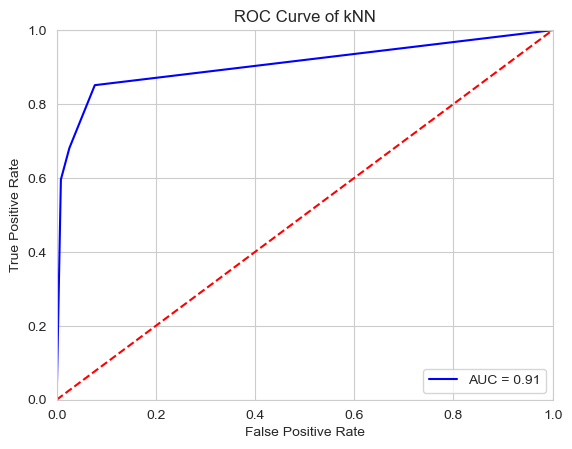

In [33]:
#plotting Roc curve for the model

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()